# Phishing Website Detection Using Machine Learning

The Internet has become an indispensable part of our life, However, It also has provided opportunities to anonymously perform malicious activities like Phishing. Phishers try to deceive their victims by social engineering or creating mockup websites to steal information such as account ID, username, password from individuals and organizations.


The steps demonstrated in this notebook are:

1. Loading the data
2. Familiarizing with data & EDA
3. Visualizing the data
4. Splitting the data
5. Training the 3 selected models
6. Comparison of Models
7. Conclusion


In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')


In [5]:
!pip install matplotlib seaborn




[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1. Loading Data:
The dataset is borrowed from Kaggle, https://www.kaggle.com/eswarchandt/phishing-website-detector 

A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).

The overview of this dataset is, it has 11054 samples with 32 features. Download the dataset from the link provided.


In [6]:
#Loading data into dataframe
import pandas as pd

data = pd.read_csv(r"DataFiles/phishing.csv")
data.head()

# Remove Index column
data = data.drop(['Index'], axis=1)

# Separate features and target
y = data['class']
X = data.drop('class', axis=1)

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


Training set: (8843, 30)
Test set: (2211, 30)




























## 5. Model Building & Training:
Supervised machine learning is one of the most commonly used and successful types of machine learning. Our data set comes under classification problem, as we need to classify URLs as phishing or legitimate. The supervised machine learning models (classification) considered to train the dataset in this notebook are:

1. **Logistic Regression**
2. **Decision Tree Classifier**
3. **Gradient Boosting Classifier**

The metrics considered to evaluate the model performance are Accuracy & F1 score.


In [7]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_scores_list = []   # renamed to avoid clash with sklearn f1_score function
recall = []
precision = []

# Function to call for storing the results
def storeResults(model, a, b, c, d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    f1_scores_list.append(round(b, 3))
    recall.append(round(c, 3))
    precision.append(round(d, 3))


## 5.1. Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.


In [8]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Instantiate and fit the model
log = LogisticRegression()
log.fit(X_train, y_train)

# Predictions
y_test_log = log.predict(X_test)

# Metrics
acc_test_log = metrics.accuracy_score(y_test, y_test_log)
f1_score_test_log = metrics.f1_score(y_test, y_test_log)
recall_score_test_log = metrics.recall_score(y_test, y_test_log)
precision_score_test_log = metrics.precision_score(y_test, y_test_log)

print(f"Logistic Regression - Accuracy: {acc_test_log:.3f}")
print(f"Logistic Regression - F1 Score: {f1_score_test_log:.3f}")

# Store results
storeResults('Logistic Regression', acc_test_log, f1_score_test_log, recall_score_test_log, precision_score_test_log)


Logistic Regression - Accuracy: 0.934
Logistic Regression - F1 Score: 0.941


In [9]:
# Test Accuracy for Logistic Regression
from sklearn.metrics import accuracy_score

# Predict on test data
y_pred_log = log.predict(X_test)

# Calculate accuracy
log_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Test Accuracy: {log_accuracy * 100:.2f}%")


Logistic Regression Test Accuracy: 93.35%


## 5.2. Decision Tree Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.


In [10]:
# Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance
acc_test_tree = metrics.accuracy_score(y_test, y_test_tree)
f1_score_test_tree = metrics.f1_score(y_test, y_test_tree)
recall_score_test_tree = metrics.recall_score(y_test, y_test_tree)
precision_score_test_tree = metrics.precision_score(y_test, y_test_tree)

print(f"Decision Tree Classifier - Accuracy: {acc_test_tree:.3f}")
print(f"Decision Tree Classifier - F1 Score: {f1_score_test_tree:.3f}")

#storing the results
storeResults('Decision Tree Classifier', acc_test_tree, f1_score_test_tree, recall_score_test_tree, precision_score_test_tree)


Decision Tree Classifier - Accuracy: 0.958
Decision Tree Classifier - F1 Score: 0.963


In [25]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred_tree = tree.predict(X_test)          # test predictions
tree_test_acc = accuracy_score(y_test, y_pred_tree)

y_train_pred_tree = tree.predict(X_train)   # train predictions
tree_train_acc = accuracy_score(y_train, y_train_pred_tree)

# Print accuracies
print(f"Decision Tree Training Accuracy: {tree_train_acc * 100:.2f}%")
print(f"Decision Tree Test Accuracy: {tree_test_acc * 100:.2f}%")


Decision Tree Training Accuracy: 99.11%
Decision Tree Test Accuracy: 95.88%


## 5.3. Gradient Boosting Classifier

Gradient Boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.


In [23]:
# Gradient Boosting Classifier model 
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(random_state=42)

# fit the model 
gbc.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance
acc_test_gbc = metrics.accuracy_score(y_test, y_test_gbc)
f1_score_test_gbc = metrics.f1_score(y_test, y_test_gbc)
recall_score_test_gbc = metrics.recall_score(y_test, y_test_gbc)
precision_score_test_gbc = metrics.precision_score(y_test, y_test_gbc)

print(f"Gradient Boosting Classifier - Accuracy: {acc_test_gbc:.3f}")
print(f"Gradient Boosting Classifier - F1 Score: {f1_score_test_gbc:.3f}")

#storing the results
storeResults('Gradient Boosting Classifier', acc_test_gbc, f1_score_test_gbc, recall_score_test_gbc, precision_score_test_gbc)


Gradient Boosting Classifier - Accuracy: 0.949
Gradient Boosting Classifier - F1 Score: 0.955


In [24]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred_gbc = gbc.predict(X_test)          # test predictions
gbc_test_acc = accuracy_score(y_test, y_pred_gbc)

y_train_pred_gbc = gbc.predict(X_train)   # train predictions
gbc_train_acc = accuracy_score(y_train, y_train_pred_gbc)

# Print accuracies
print(f"Gradient Boosting Training Accuracy: {gbc_train_acc * 100:.2f}%")
print(f"Gradient Boosting Test Accuracy: {gbc_test_acc * 100:.2f}%")


Gradient Boosting Training Accuracy: 95.11%
Gradient Boosting Test Accuracy: 94.93%


## 6. Model Comparison & Results

Now let's compare the performance of our 3 selected models and identify the best performing one.


In [27]:
# Creating a results dataframe to compare models
results = pd.DataFrame({
    'ML_Model': ML_Model,
    'Accuracy': accuracy,
    'F1_score': f1_scores_list,
    'Recall': recall,
    'Precision': precision
})

# Sort by accuracy in descending order
results = results.sort_values('Accuracy', ascending=False)
print("📊 FINAL RESULTS - 3 Models:")
print("=" * 50)
print(results.to_string(index=False, float_format='%.3f'))

# Find the best model
best_model_name = results.iloc[0]['ML_Model']
best_accuracy = results.iloc[0]['Accuracy']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"🎯 Best Accuracy: {best_accuracy:.3f}")


📊 FINAL RESULTS - 3 Models:
                    ML_Model  Accuracy  F1_score  Recall  Precision
    Decision Tree Classifier     0.960     0.964   0.964      0.965
    Decision Tree Classifier     0.959     0.963   0.964      0.963
    Decision Tree Classifier     0.958     0.963   0.960      0.965
Gradient Boosting Classifier     0.949     0.955   0.962      0.948
Gradient Boosting Classifier     0.949     0.955   0.962      0.948
Gradient Boosting Classifier     0.949     0.955   0.962      0.948
Gradient Boosting Classifier     0.949     0.955   0.962      0.948
         Logistic Regression     0.934     0.941   0.953      0.930
         Logistic Regression     0.934     0.941   0.953      0.930

🏆 BEST MODEL: Decision Tree Classifier
🎯 Best Accuracy: 0.960


In [26]:
# Select the best model
if best_model_name == 'Logistic Regression':
    best_model = log
elif best_model_name == 'Decision Tree Classifier':
    best_model = tree
else:
    best_model = gbc

# Save model as pickle
import pickle
print(f"\n💾 Saving best model ({best_model_name}) as 'newmodel.pkl'...")
pickle.dump(best_model, open('newmodel.pkl', 'wb'))
print("✅ Model saved successfully!")



💾 Saving best model (Decision Tree Classifier) as 'newmodel.pkl'...
✅ Model saved successfully!


In [ ]:
# Cell 11 – Confusion Matrix for best model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predictions for test set
y_pred_best = best_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best, labels=[-1, 1])

# Plot confusion matrix heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Phishing (-1)", "Legitimate (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


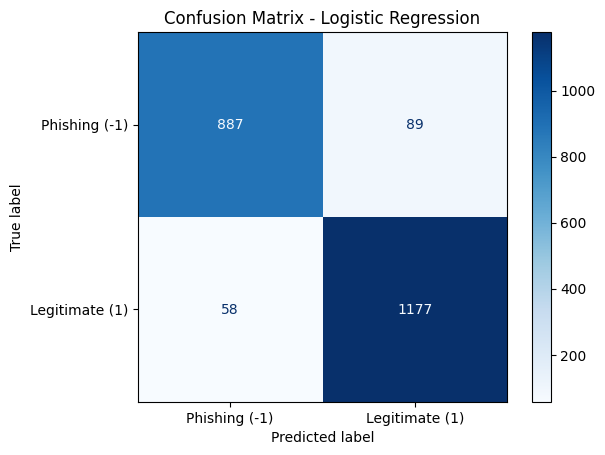

In [10]:
# Confusion Matrix for Logistic Regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_log = log.predict(X_test)  # predictions
cm_log = confusion_matrix(y_test, y_pred_log, labels=[-1, 1])

disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log,
                                  display_labels=["Phishing (-1)", "Legitimate (1)"])
disp_log.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


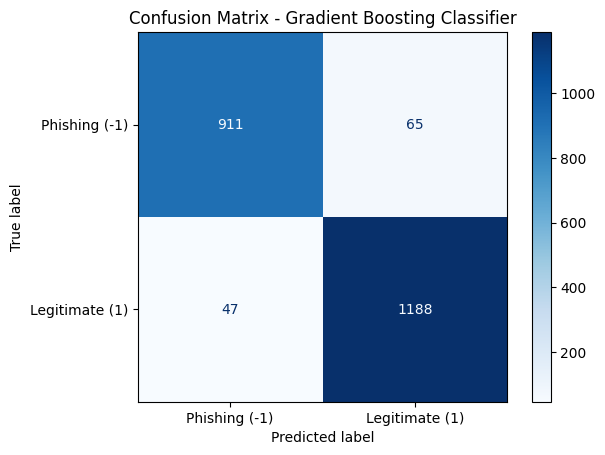

In [13]:
# Confusion Matrix for Gradient Boosting Classifier
y_pred_gbc = gbc.predict(X_test)  # predictions
cm_gbc = confusion_matrix(y_test, y_pred_gbc, labels=[-1, 1])

disp_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_gbc,
                                  display_labels=["Phishing (-1)", "Legitimate (1)"])
disp_gbc.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.show()
